In [187]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


from math import log as log
import os

In [119]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Посмотрим на предоставленные датасеты


client_id	     идентификатор клиента 

education	     уровень образования

sex	             пол заёмщика

age	             возраст заёмщика

car	             флаг наличия автомобиля

car_type	     флаг автомобиля-иномарки

decline_app_cnt	 количество отказанных прошлых заявок

good_work	     флаг наличия «хорошей» работы

bki_request_cnt	 количество запросов в БКИ

home_address	 категоризатор домашнего адреса

work_address	 категоризатор рабочего адреса

income	         доход заёмщика

foreign_passport наличие загранпаспорта

default	         наличие дефолта

In [120]:
#Размерность
print(train.shape)
print(test.shape)

(73799, 19)
(36349, 18)


In [121]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [122]:
def param_data(data): # посмотрим на данные
    """dataset required parameters """
    param = pd.DataFrame({
              'dtypes': data.dtypes.values,
              'nunique': data.nunique().values,
              'isna': data.isna().sum().values,
              'loc[0]': data.loc[0].values,
              }, 
             index = data.loc[0].index)
    return param

pd.concat([param_data(train), param_data(test)], 
          axis=1, 
          keys = [f'↓ ОБУЧАЮЩАЯ ВЫБОРКА ↓ {train.shape}', f'↓ ТЕСТОВАЯ ВЫБОРКА ↓ {test.shape}'],  
          sort=False)

↓ ОБУЧАЮЩАЯ ВЫБОРКА ↓ (73799, 19)                          \
                                            dtypes nunique isna     loc[0]   
client_id                                    int64   73799    0      25905   
app_date                                    object     120    0  01FEB2014   
education                                   object       5  307        SCH   
sex                                         object       2    0          M   
age                                          int64      52    0         62   
car                                         object       2    0          Y   
car_type                                    object       2    0          Y   
decline_app_cnt                              int64      21    0          0   
good_work                                    int64       2    0          0   
score_bki                                  float64   69096    0   -2.00875   
bki_request_cnt                              int64      38    0          1   
region_rating                                int64       7    0         50   
home_address                                 int64       3    0          1   
work_address                                 int64       3    0          2   
income                                       int64     966    0      18000   
sna                                          int64       4    0          4   
first_time                                   int64       4    0          1   
foreign_passport                            object       2    0          N   
default                                      int64       2    0          0   

                 ↓ ТЕСТОВАЯ ВЫБОРКА ↓ (36349, 18)                             
                                           dtypes  nunique   isna     loc[0]  
client_id                                   int64  36349.0    0.0      74835  
app_date                                   object    120.0    0.0  22MAR2014  
education                                  object      5.0  171.0        GRD  
sex                                        object      2.0    0.0          M  
age                                         int64     51.0    0.0         29  
car                                        object      2.0    0.0          Y  
car_type                                   object      2.0    0.0          Y  
decline_app_cnt                             int64     19.0    0.0          0  
good_work                                   int64      2.0    0.0          0  
score_bki                                 float64  34287.0    0.0   -2.27188  
bki_request_cnt                             int64     34.0    0.0          3  
region_rating                               int64      7.0    0.0         50  
home_address                                int64      3.0    0.0          1  
work_address                                int64      3.0    0.0          2  
income                                      int64    685.0    0.0      50000  
sna                                         int64      4.0    0.0          1  
first_time                                  int64      4.0    0.0          4  
foreign_passport                           object      2.0    0.0          N  
default                                       NaN      NaN    NaN        NaN

Посмотрим на "заполненность" датасетов

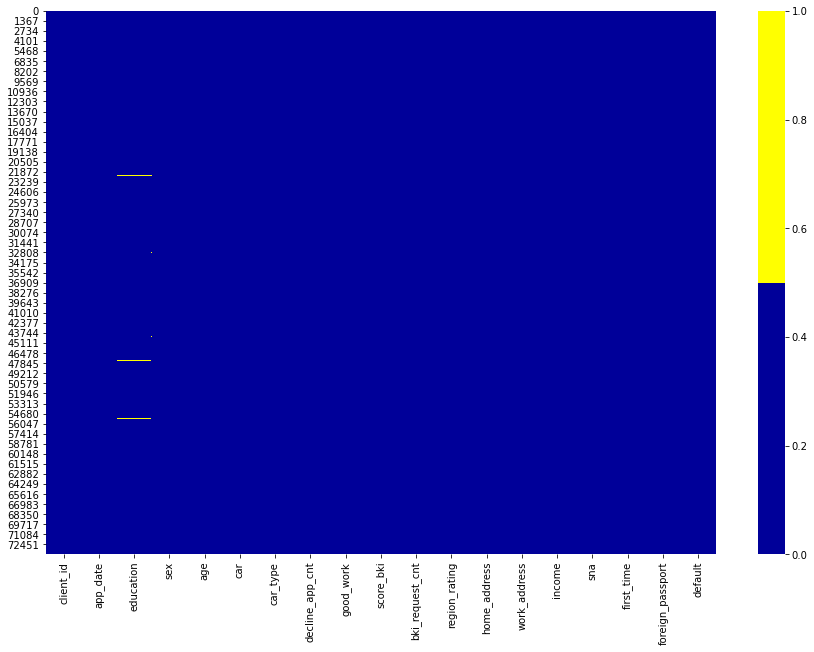

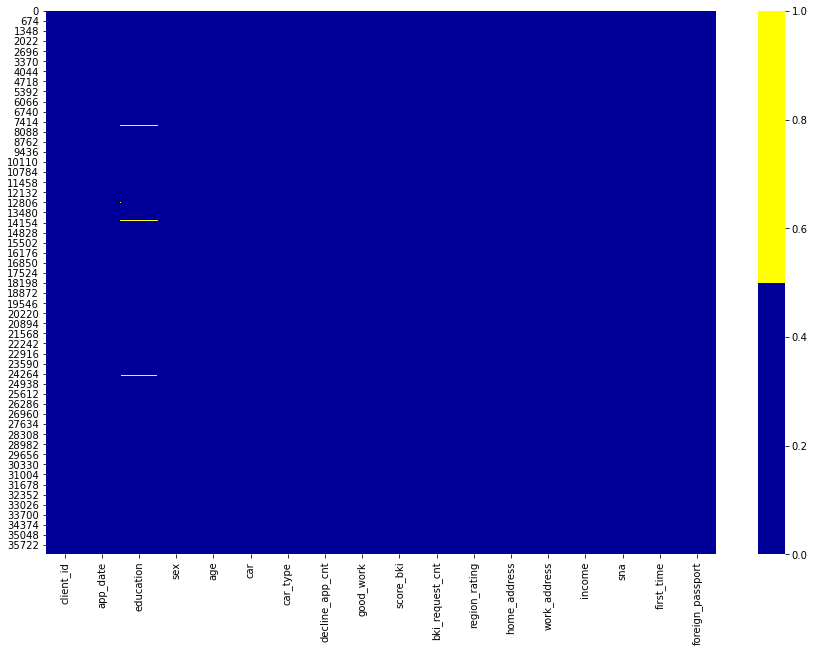

In [123]:
def viz_na(data):
    """NA visualisation"""
    global cols
    cols = data.columns # запишем названия строки сделаем переменную глобальной
    # определяем цвета 
    # желтый - пропущенные данные, синий - не пропущенные
    colours = ['#000099', '#ffff00'] 
    sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
    plt.show()


viz_na(train)
viz_na(test)

In [124]:
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

client_id - 0.0%
app_date - 0.0%
education - 0.41599479667746175%
sex - 0.0%
age - 0.0%
car - 0.0%
car_type - 0.0%
decline_app_cnt - 0.0%
good_work - 0.0%
score_bki - 0.0%
bki_request_cnt - 0.0%
region_rating - 0.0%
home_address - 0.0%
work_address - 0.0%
income - 0.0%
sna - 0.0%
first_time - 0.0%
foreign_passport - 0.0%
default - 0.0%


In [125]:
for col in test.columns:
    pct_missing = np.mean(test[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

client_id - 0.0%
app_date - 0.0%
education - 0.4704393518391152%
sex - 0.0%
age - 0.0%
car - 0.0%
car_type - 0.0%
decline_app_cnt - 0.0%
good_work - 0.0%
score_bki - 0.0%
bki_request_cnt - 0.0%
region_rating - 0.0%
home_address - 0.0%
work_address - 0.0%
income - 0.0%
sna - 0.0%
first_time - 0.0%
foreign_passport - 0.0%


Видим, что:
* пропусков в данных практически нет. Присутсвуют только в графе education
* в train на один столбец больше -что и естественно, на саму целевую переменную default

Для корректной обработки признаков объединяем трейн и тест в один датасет, но для начала 
Добавим колонку, чтобы потом различать где тест, а где трейн

In [126]:
train['Train'] = 1 # помечаем где у нас трейн
test['Train'] = 0 # помечаем где у нас тест

In [127]:
#объединяем датасеты
bank = train.append(test, sort=False).reset_index(drop=True)
#при объединении датасетов в тесте столбца дефол не было,
#поэтому пока вместо пропусков поставим нули
bank.default.fillna(0, inplace=True)

In [128]:
#посмотрим, что получилось
bank.head(-2)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,Train
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0.0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110141,42509,19FEB2014,SCH,F,58,Y,Y,0,1,-1.857117,1,50,2,3,25000,4,3,N,0.0,0
110142,72405,20MAR2014,SCH,F,40,N,N,0,0,-2.039905,0,50,2,3,20000,4,1,N,0.0,0
110143,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N,0.0,0
110144,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N,0.0,0


In [129]:
#разделим наши признаки по группам
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']

#client_id не включали ни в один список, не несет смысловой нагрузки для построения модели

Посмотрим наиболее важные для целевой переменной  признаки

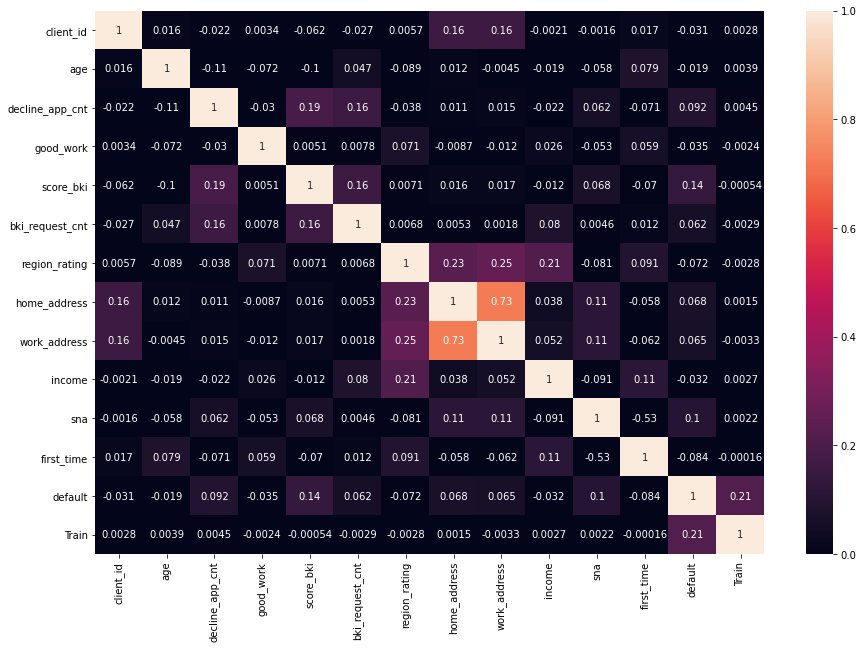

In [130]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(bank.corr(), vmin=0, vmax=1, annot = True)

Видим высокую корреляцию между car и car_type,  а также work_address и home_address

### Рассмотрим бинарные переменные

In [131]:
display(bank[bin_cols])

,sex,car,car_type,good_work,foreign_passport
0,M,Y,Y,0,N
1,F,N,N,0,N
2,M,Y,N,0,Y
3,F,N,N,0,N
4,M,N,N,1,Y
...,...,...,...,...,...
110143,F,N,N,0,N
110144,F,Y,Y,0,N
110145,M,N,N,0,N
110146,F,N,N,0,N


In [132]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    bank[column] = label_encoder.fit_transform(bank[column])

In [133]:
 # убедимся в преобразовании    
display(bank[bin_cols])

,sex,car,car_type,good_work,foreign_passport
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,0,0,1
3,0,0,0,0,0
4,1,0,0,1,1
...,...,...,...,...,...
110143,0,0,0,0,0
110144,0,1,1,0,0
110145,1,0,0,0,0
110146,0,0,0,0,0


### Рассмотрим категориальные переменные

In [134]:
display(bank[cat_cols])

,education,home_address,work_address,sna,first_time
0,SCH,1,2,4,1
1,SCH,2,3,4,1
2,SCH,1,2,1,4
3,SCH,2,3,1,3
4,GRD,2,3,1,4
...,...,...,...,...,...
110143,SCH,2,3,4,1
110144,GRD,1,2,1,4
110145,GRD,1,2,4,2
110146,UGR,2,3,1,1


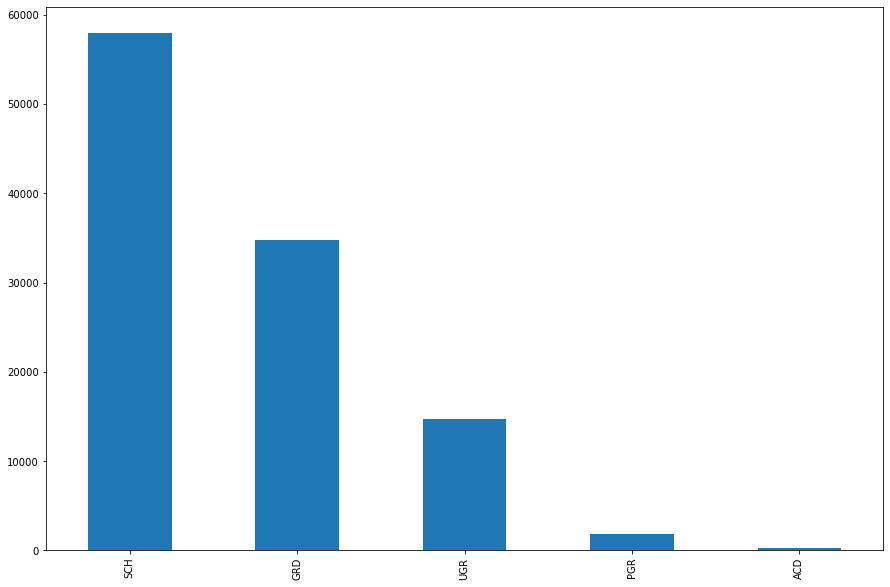

In [135]:
bank.education.value_counts().plot.bar()

In [136]:
display(bank[cat_cols])

,education,home_address,work_address,sna,first_time
0,SCH,1,2,4,1
1,SCH,2,3,4,1
2,SCH,1,2,1,4
3,SCH,2,3,1,3
4,GRD,2,3,1,4
...,...,...,...,...,...
110143,SCH,2,3,4,1
110144,GRD,1,2,1,4
110145,GRD,1,2,4,2
110146,UGR,2,3,1,1


Посмотрим на зависимость дохода от уровня образования

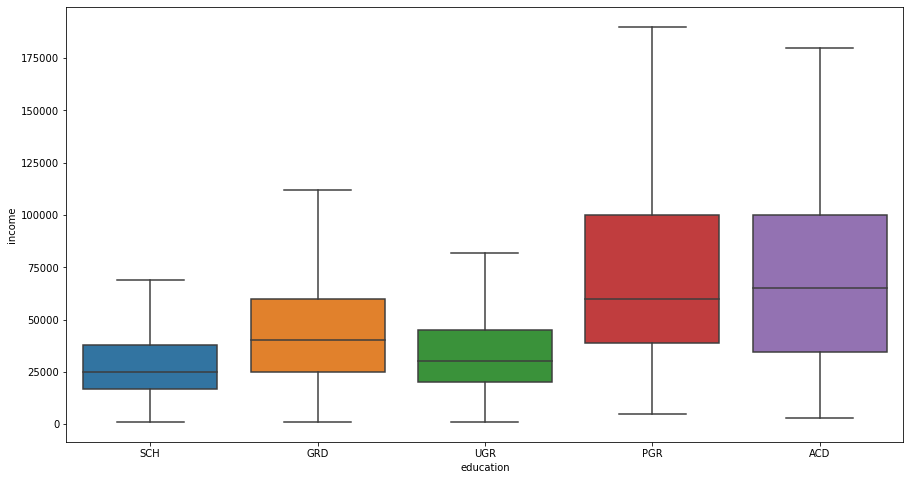

In [137]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="education", y="income", data=bank, showfliers=False)

### Работа с числовыми признаками

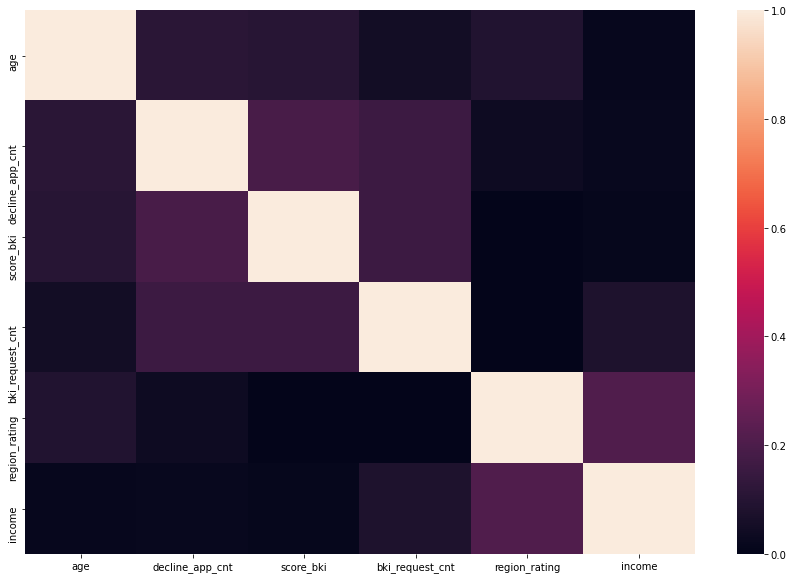

In [138]:
sns.heatmap(bank[num_cols].corr().abs(), vmin=0, vmax=1)

Оценка значимости переменных

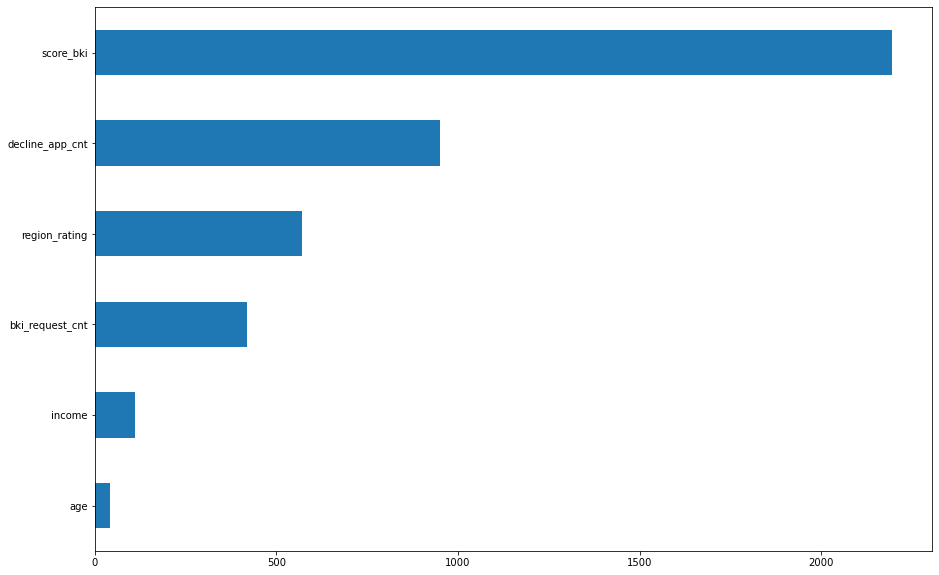

In [139]:
# оценка значимости переменных
imp_num = Series(f_classif(bank[num_cols], bank['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Таким образом, наиболее важные признаки из числовых:
* связь заемщика с клиентами банка
* количество отказанных прошлых заявок

Посмотрим на распределения числовых признаков

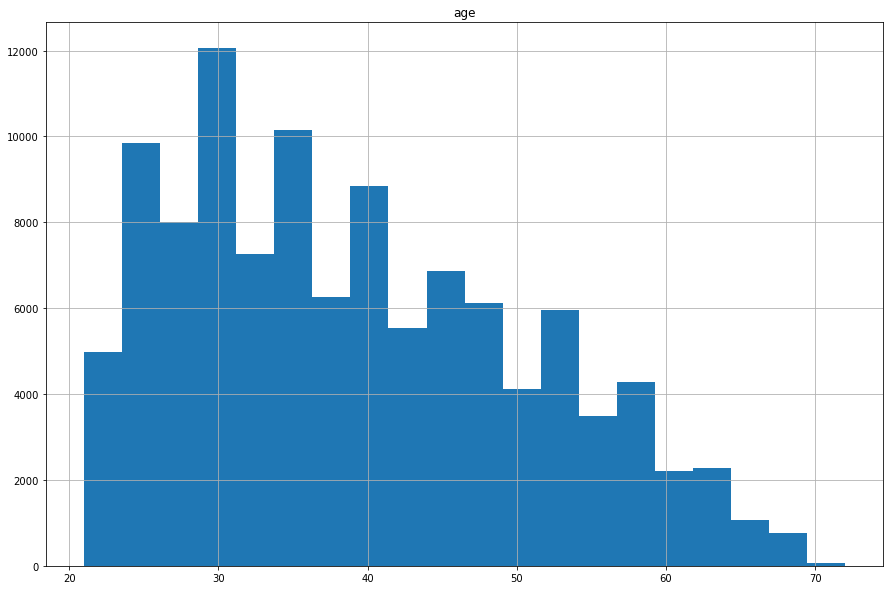

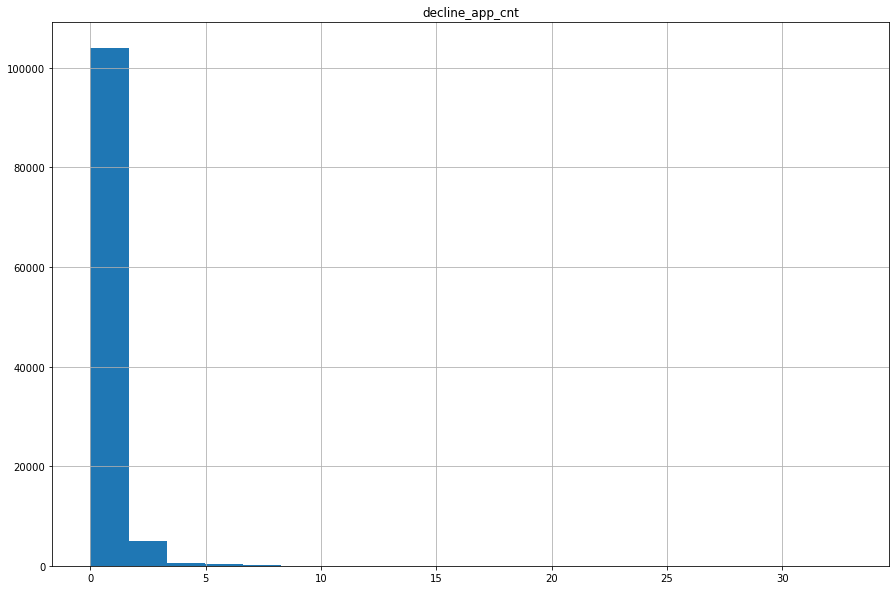

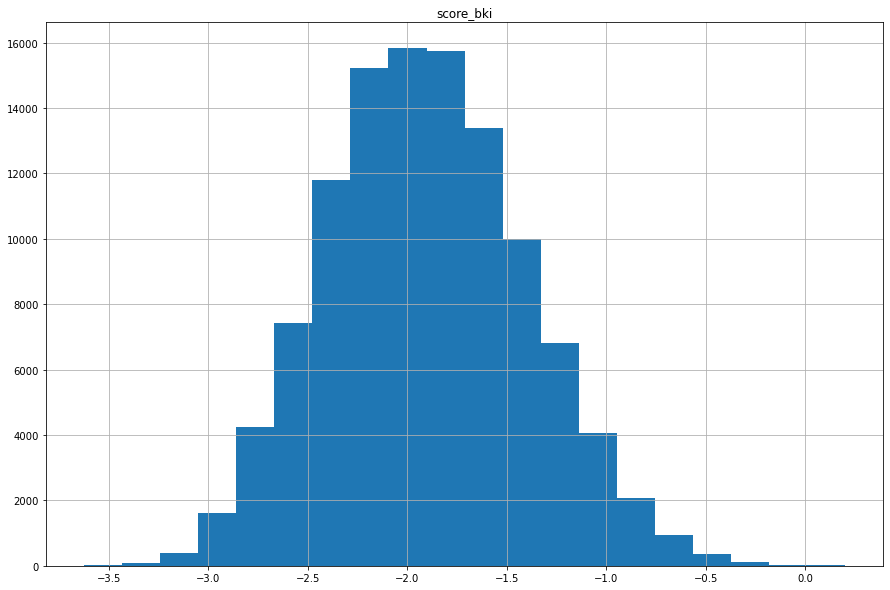

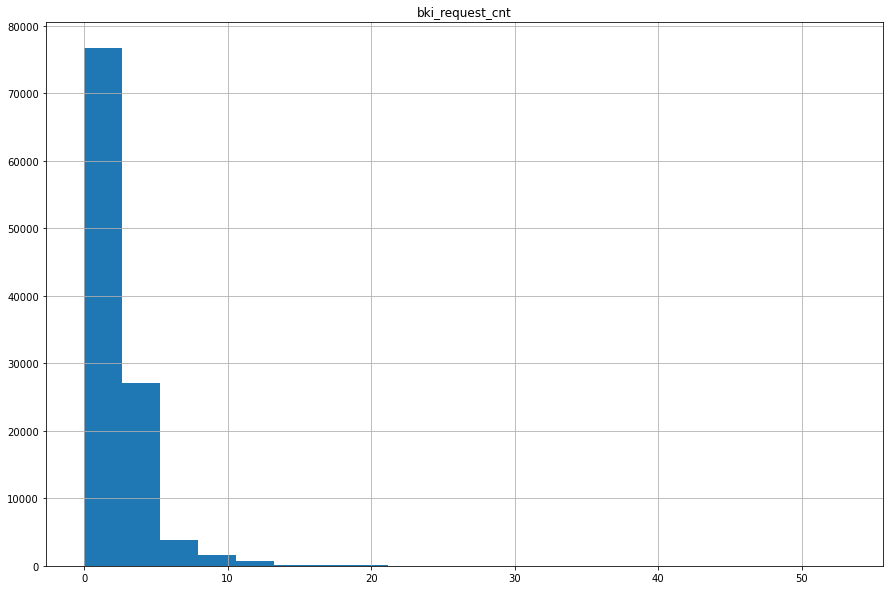

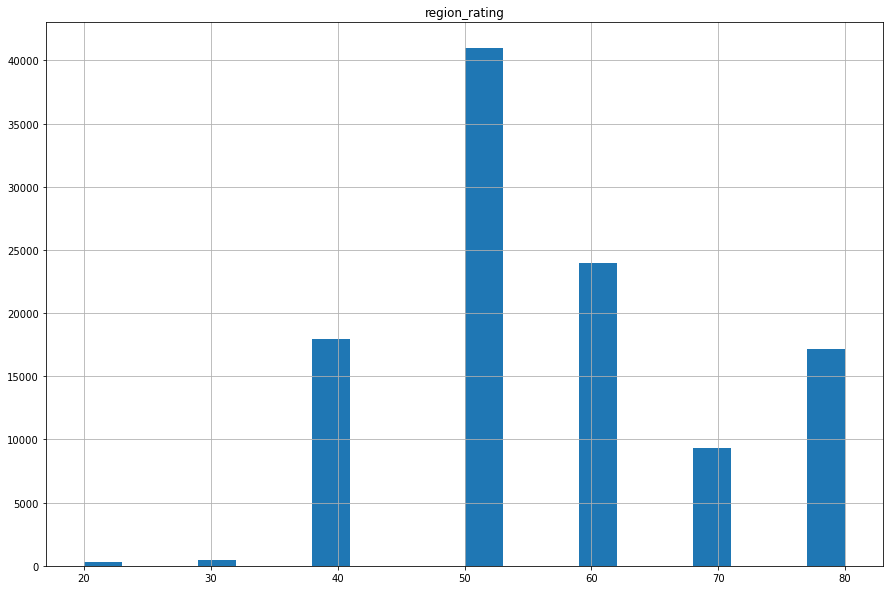

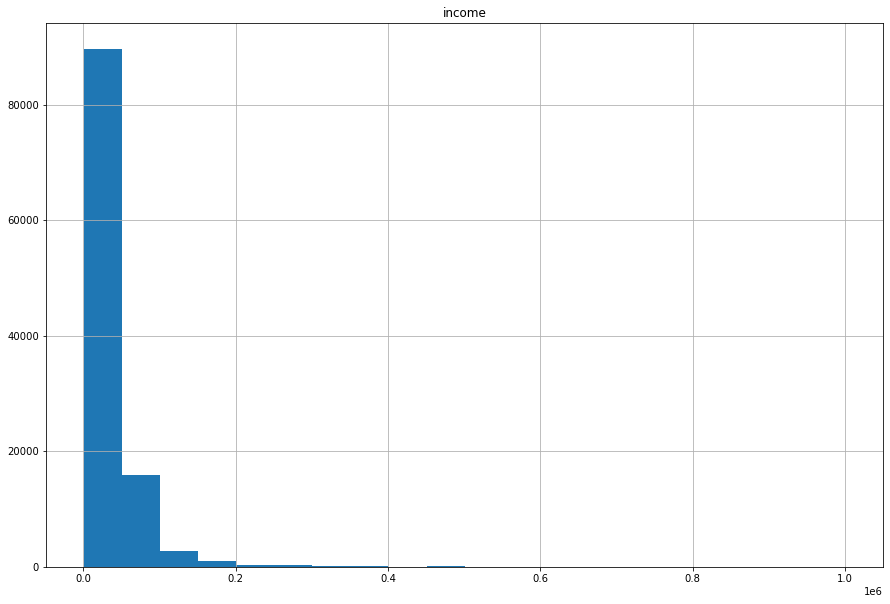

In [140]:
for i in num_cols:
   
    # выводим распределение заемщиков по признакам
    bank[i].hist(bins=20)
    plt.title(i)
    plt.show()

Пробуем логарифмировать признаки:

In [141]:
# замену производим для всего датасета data
bank['age'] = np.log(bank['age']+1)
bank['bki_request_cnt'] = np.log(bank['bki_request_cnt']+1)
bank['income'] = np.log(bank['income']+1)
#bank['decline_app_cnt'] = np.log(bank['decline_app_cnt']+1)
#bank['score_bki'] = np.log(bank['score_bki']+1)
#bank['region_rating'] = np.log(bank['region_rating']+1)

Переменные "decline_app_cnt" "score_bki"б "region_rating" оставим без изменений - логарифмирование и извлечение квадратного корня не делают распределение более нормальным.

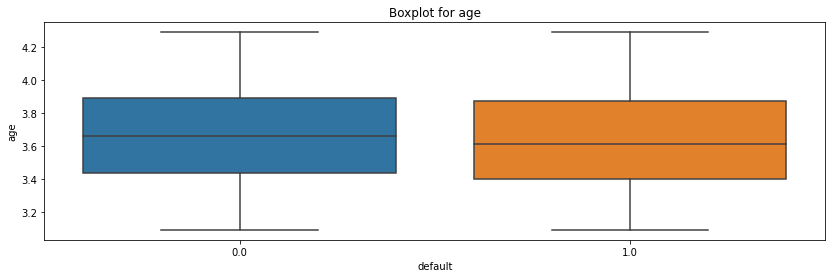

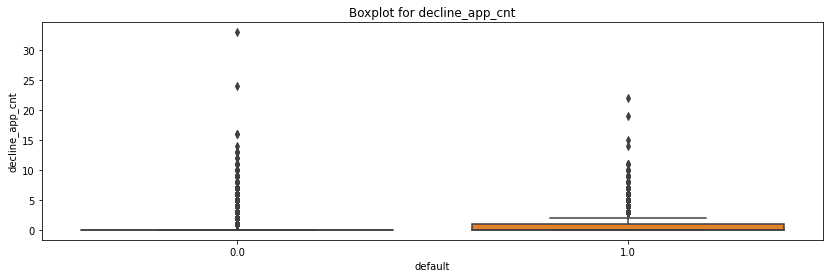

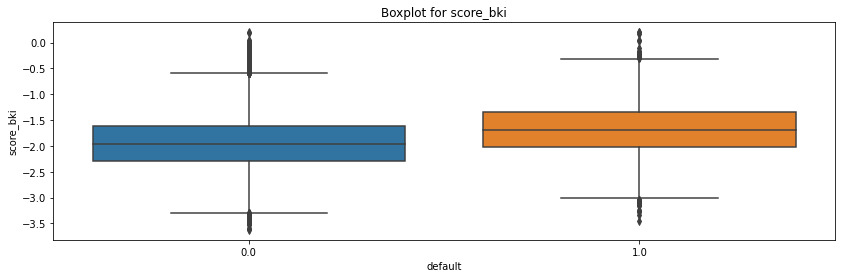

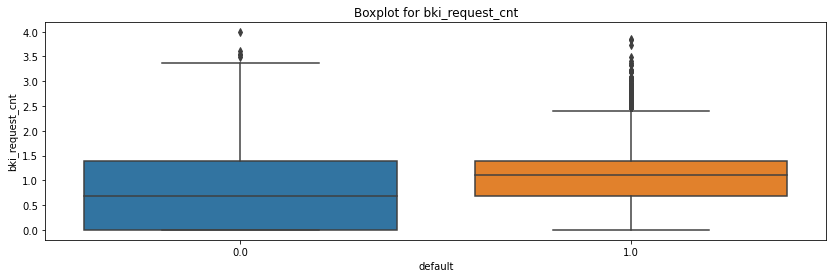

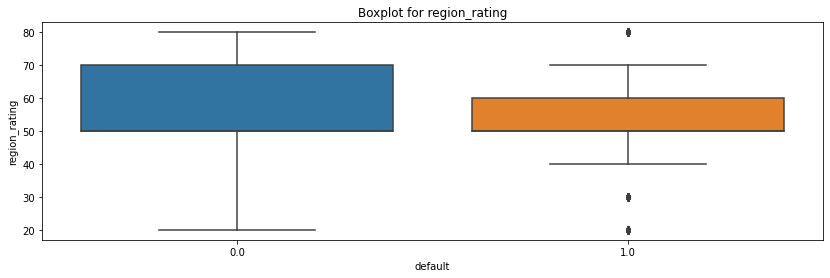

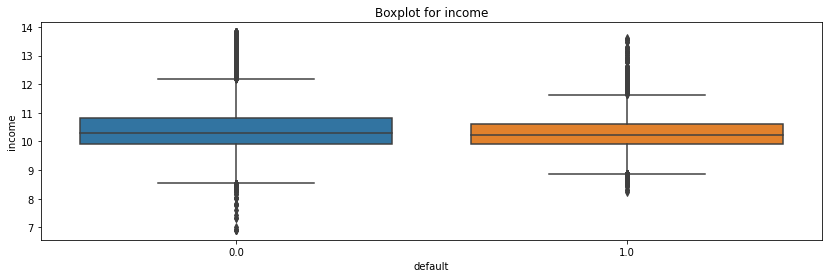

In [142]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=col, data=bank[bank['Train']==1],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
for col in num_cols:
    boxplot(col)

Выводы:
* люди, у которых не было дефолта по кредитам как правило старше
* люди, у которых был дефолт имеют выше скоринговый балл по данным из БКИ 
* bki_request_cnt выше у людей с дефолтом
* в среднем люди с более высоким доходом имеют меньший процент дефолтов

### Feature Engineering

#### Education

In [143]:
#заполню пропуски в education самой популярной категорией school, т.к. можно 
#предположить что практически все имееют среднее образование
bank.education.fillna('SCH', inplace=True)

#### app_date

In [145]:
#поменяю формат даты
bank.app_date = pd.to_datetime(bank.app_date, format='%d%b%Y')

In [146]:
#введу новый признак - количество дней с первой записи
bank['days_from_1st_date'] = bank['app_date'].apply(lambda x: (x - bank['app_date'].min()).days) # days from the first date

In [147]:
#посчитаем количество дефолтов в день
bank['numbers'] = bank.groupby(['app_date'])['default'].transform('count')

In [148]:
app_number=bank.groupby(['app_date'])['default'].transform('count')

Скопирую датафрейм в промежуточный, чтобы экспериментировать, не подгружая каждый раз, если что то пойдет не так

In [150]:
df = bank.copy()

Новые признаки:

In [151]:
# Средний доход в зависимости от возраста
mean_income = df.groupby('age')['income'].mean().to_dict()
df['mean_income_age'] = df['age'].map(mean_income)

In [152]:
# Максимальный доход в зависимости от возраста
max_income = df.groupby('age')['income'].max().to_dict()
df['max_income_age'] = df['age'].map(max_income)

In [153]:
# Нормализованный доход
df["normalized_income"] = abs((df.income - df.mean_income_age)/df.max_income_age)

In [154]:
# requests to BKI by age
mean_bki = df.groupby('age')['bki_request_cnt'].mean().to_dict()
df['mean_requests_age'] = df['age'].map(mean_bki)

In [155]:
# mean BKI requests by income
mean_bki_inc = df.groupby('income')['bki_request_cnt'].mean().to_dict()
df['mean_requests_income'] = df['income'].map(mean_bki_inc)

In [156]:
# Mean income by region
mean_income_rat = df.groupby('region_rating')['income'].mean().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_income_rat)

### Encoding

In [157]:
mapp = {}
label_encoder = LabelEncoder()
for col in bin_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mapp[col] = dict(enumerate(label_encoder.classes_))

In [158]:
mappc = {}
enc = OneHotEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappc[col] = dict(enumerate(label_encoder.classes_))

In [159]:
print(mapp)
print(mappc)

{'sex': {0: 0, 1: 1}, 'car': {0: 0, 1: 1}, 'car_type': {0: 0, 1: 1}, 'good_work': {0: 0, 1: 1}, 'foreign_passport': {0: 0, 1: 1}}
{'education': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'home_address': {0: 1, 1: 2, 2: 3}, 'work_address': {0: 1, 1: 2, 2: 3}, 'sna': {0: 1, 1: 2, 2: 3, 3: 4}, 'first_time': {0: 1, 1: 2, 2: 3, 3: 4}}


In [160]:
df.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'Train',
       'days_from_1st_date', 'numbers', 'mean_income_age', 'max_income_age',
       'normalized_income', 'mean_requests_age', 'mean_requests_income',
       'mean_income_region'],
      dtype='object')

In [163]:
# Обновим распределние признаков на категории
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','days_from_1st_date', 'mean_income_age','region_rating','max_income_age', 'normalized_income',
       'mean_requests_age', 'mean_requests_income', 'mean_income_region'] # numerical
cat_cols = ['education','work_address','home_address','sna','first_time'] # categorical
bin_cols = ['sex','car','car_type','good_work','foreign_passport'] # binary
datetime_cols = ['app_date']

### Work with outliers

In [164]:
for col in num_cols:
    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print("Columns: ", col)
    print('25%: {},'.format(perc25), '75%: {},'.format(perc75), 
          "IQR: {}, ".format(IQR),"Borderline: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Columns:  age
25%: 3.4339872044851463, 75%: 3.8918202981106265, IQR: 0.4578330936254802,  Borderline: [2.7472375640469258, 4.5785699385488465].
Columns:  decline_app_cnt
25%: 0.0, 75%: 0.0, IQR: 0.0,  Borderline: [0.0, 0.0].
Columns:  score_bki
25%: -2.2604336700000003, 75%: -1.5678881525, IQR: 0.6925455175000004,  Borderline: [-3.299251946250001, -0.5290698762499992].
Columns:  income
25%: 9.90353755128617, 75%: 10.778977123006351, IQR: 0.8754395717201806,  Borderline: [8.590378193705899, 12.092136480586621].
Columns:  bki_request_cnt
25%: 0.0, 75%: 1.3862943611198906, IQR: 1.3862943611198906,  Borderline: [-2.0794415416798357, 3.465735902799726].
Columns:  days_from_1st_date
25%: 33.0, 75%: 89.0, IQR: 56.0,  Borderline: [-51.0, 173.0].
Columns:  mean_income_age
25%: 10.305358726970132, 75%: 10.444420558250247, IQR: 0.13906183128011484,  Borderline: [10.096765980049959, 10.653013305170418].
Columns:  region_rating
25%: 50.0, 75%: 60.0, IQR: 10.0,  Borderline: [35.0, 75.0].
Columns:  m

### Scaling

Снова сохраним промежуточный датасет

In [165]:
df1 = df.copy()
dataset = df.copy()

In [166]:
dataset[num_cols] = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns = df[num_cols].columns)

### Оценка значимости признаков

#### Числовые

In [167]:
data_temp = dataset.loc[bank['Train'] == 1] 

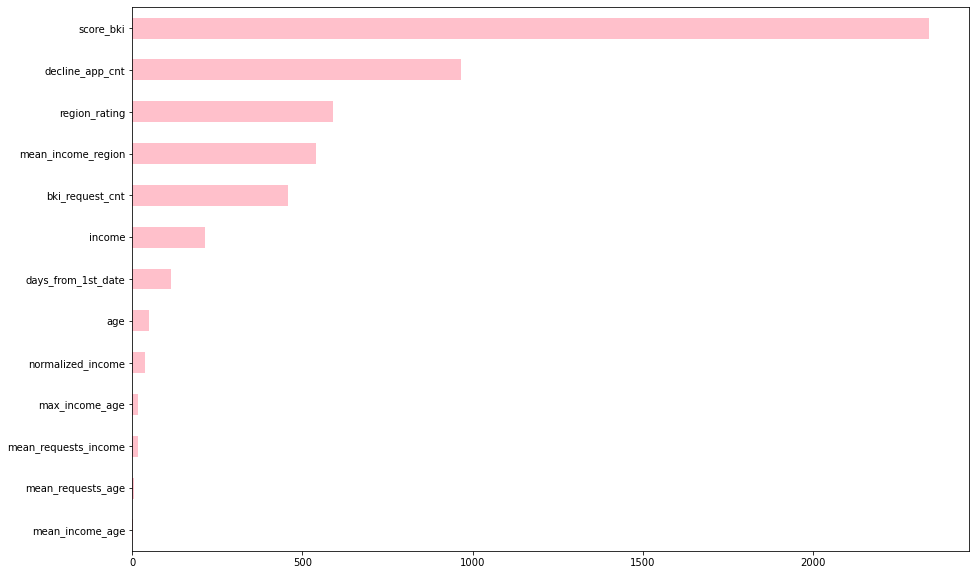

In [168]:
imp_num = pd.Series(f_classif(data_temp[num_cols], data_temp['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', color='pink')

#### Категориальные и бинарные признаки

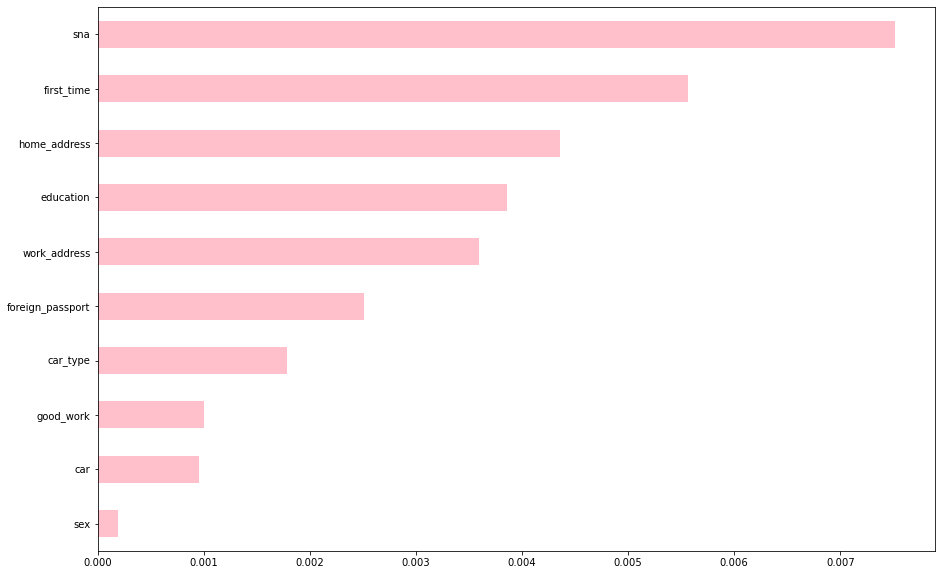

In [169]:
imp_cat = pd.Series(mutual_info_classif(data_temp[bin_cols + cat_cols], data_temp['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', color='pink')

### Строим модель

In [175]:
train_df = df.query('Train == 1').drop(['Train','client_id','app_date'], axis=1)
test_df = df.query('Train == 0').drop(['Train','client_id','app_date'], axis=1)

In [176]:
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values # целевая переменная

In [177]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=32)

In [178]:
lr = LogisticRegression(max_iter = 1000)

In [179]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

### Оценка эффективности модели

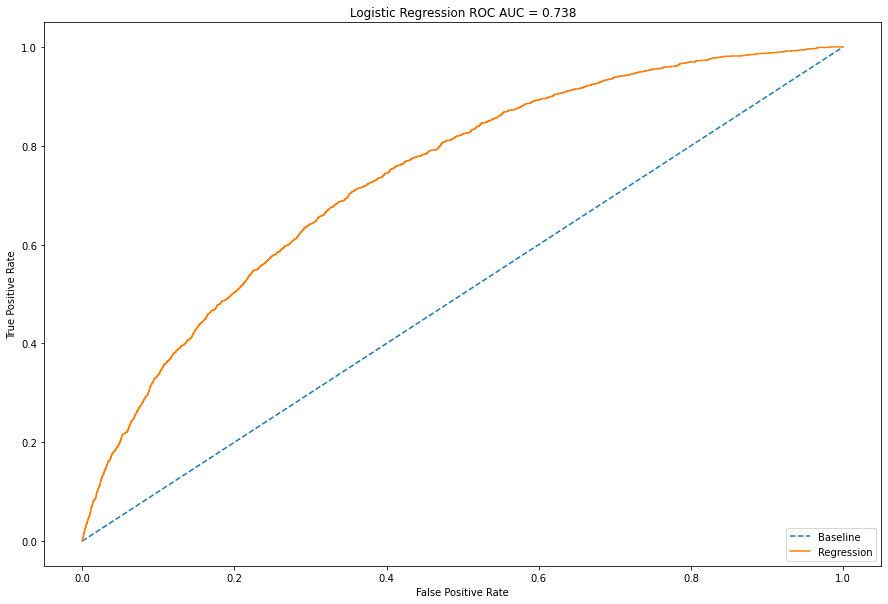

In [180]:
probs = lr.predict_proba(X_valid)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [183]:
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.8705284552845528
precision_score: 0.47413793103448276
recall_score: 0.028871391076115485
f1_score: 0.05442850074220683


Показатели оставляют желать лучшего

### Построение confusion_matrix

[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

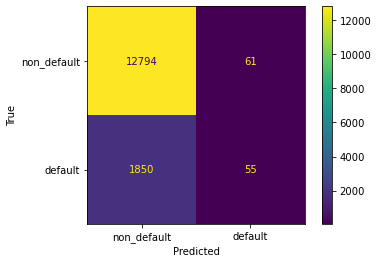

In [188]:
cm = confusion_matrix(y_valid, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

Получается, что наша модель будет выдавать кредит практически всем. Подумаем как это исправить

### Tuning

#### XGB and GridSearchCV

In [189]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [190]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [191]:
train_data = bank.query('Train == 1').drop(['Train','client_id','app_date'], axis=1)
test_data = bank.query('Train == 0').drop(['Train','client_id','app_date'], axis=1)

X_train = train_data.drop(['default'], axis=1)
y_train = train_data.default.values
X_test = test_data.drop(['default'], axis=1)

In [192]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [193]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:   41.8s remaining:  1.0min
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:  1.0min remaining:   15.5s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:  1.2min finished
C:\Users\User-PC\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001D22E7DE2E0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, mis...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsa

In [194]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([24.15833338, 39.19945304, 35.17197339, 24.7578392 , 27.21769055]), 'std_fit_time': array([0.56356274, 0.81893012, 1.56036881, 1.1591427 , 0.26882219]), 'mean_score_time': array([0.25302092, 0.42003266, 0.40236346, 0.39969595, 0.22101235]), 'std_score_time': array([0.03086862, 0.00804225, 0.02563347, 0.03795362, 0.0077897 ]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

In [195]:
test_data = X_test
y_pred = random_search.predict_proba(test_data)
results_df = pd.DataFrame(data={'client_id':test['client_id'], 'default':y_pred[:,1]})

In [196]:
results_df

,client_id,default
0,74835,0.033824
1,17527,0.247285
2,75683,0.074949
3,26883,0.069696
4,28862,0.016640
...,...,...
36344,83775,0.366616
36345,106254,0.020887
36346,81852,0.274018
36347,1971,0.301181


In [198]:
results_df.to_csv('submission2.csv', index=False)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))